

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set  collected from The Movie Database (TMDb) contains information about 10,000 movies,
the data set is divided into 21 columns the most important ones for our analysis are:                            
original_title, release_year, budget, budget_adj, revenue, revenue_adj, vote_count, vote_average, runtime , genres 

### Question(s) for Analysis

There are three main questions that this analysis intend to answer                                                    
the first one is to differentiate between genres by the most commonly produced,most profitable and most popular,              the second is see the movie industry growth over year,                                                                         the last is the find the relation between the vote (rating) and other factors
   

In [1]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
def lab_title(title,x,y,t_size=12,x_s=10,y_s=10):
    plt.title(title,fontsize=t_size);
    plt.xlabel(x,fontsize=x_s);
    plt.ylabel(y,fontsize=y_s);
    
    

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [4]:
df = pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

In [6]:
df.drop(['homepage','tagline','id','imdb_id','overview','keywords','cast','production_companies'],axis=1,inplace=True)


We droped the above data because it have no use in answering our questions  

In [7]:
df.dropna(inplace=True)
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


Also we deleted Nan values and duplicates to make our data cleaner

# <a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 what is the most common produced genres, most profitable ones and most popular?

After looking the genres columns it is shown that a movie can be categorized under more than one genres and for that movies the separation between the genres is by "|" so in order to sort the data to apply our data analysis we have taken steps

In [8]:
gens = np.array([])
for genres in df['genres']:
    gens= np.append(gens,genres.split('|'))   
gens = np.unique(gens)
gens

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], 
      dtype='<U32')

We created numpy array with all the genres that occured in the orignal dataframe and got the unique ones

In [9]:
df_new = pd.DataFrame(columns = df.columns)
for gen in gens:
    df_gen = df[df['genres'].str.contains(gen)]
    gen_array = np.repeat(gen,df_gen.shape[0])
    df_gen['genre'] = gen_array
    df_new = df_new.append(df_gen,sort=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Using the numpy array that we created we searched the original data frame by each genre and got all the movies that is under this sepcific genre in new data frame called df_new with column called genre with one genre only and genres with all genres that it falls under

In [10]:
df_new[df_new['original_title']== 'Jurassic World']

,budget,budget_adj,director,genre,genres,original_title,popularity,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
0,150000000,1.379999e+08,Colin Trevorrow,Action,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,6/9/15,2015,1513528810,1.392446e+09,124,6.5,5562
0,150000000,1.379999e+08,Colin Trevorrow,Adventure,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,6/9/15,2015,1513528810,1.392446e+09,124,6.5,5562
0,150000000,1.379999e+08,Colin Trevorrow,Science Fiction,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,6/9/15,2015,1513528810,1.392446e+09,124,6.5,5562
0,150000000,1.379999e+08,Colin Trevorrow,Thriller,Action|Adventure|Science Fiction|Thriller,Jurassic World,32.985763,6/9/15,2015,1513528810,1.392446e+09,124,6.5,5562


Now we have new dataframe (df_new) that have the genres separated for each movie by making the same row with differance in genre
only

In [11]:
df_new['genre'].value_counts() 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26869 entries, 0 to 10857
Data columns (total 14 columns):
budget            26869 non-null object
budget_adj        26869 non-null float64
director          26869 non-null object
genre             26869 non-null object
genres            26869 non-null object
original_title    26869 non-null object
popularity        26869 non-null float64
release_date      26869 non-null object
release_year      26869 non-null object
revenue           26869 non-null object
revenue_adj       26869 non-null float64
runtime           26869 non-null object
vote_average      26869 non-null float64
vote_count        26869 non-null object
dtypes: float64(4), object(10)
memory usage: 3.1+ MB


In [12]:
labels = df_new['genre'].value_counts()
print(labels)

Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genre, dtype: int64


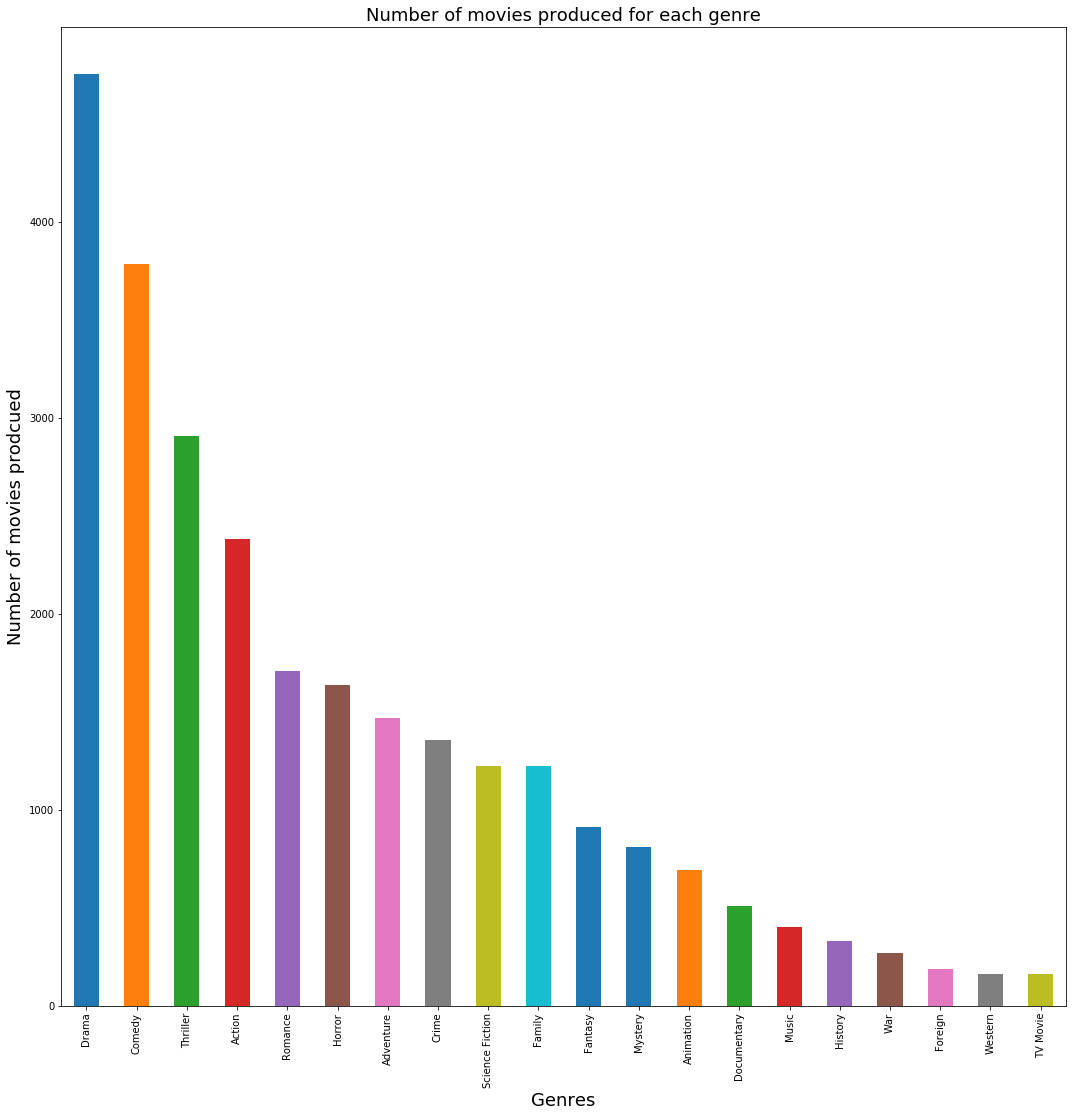

In [13]:
labels.plot(kind="bar",figsize=(18,18));
lab_title("Number of movies produced for each genre","Genres","Number of movies prodcued",18,18,18)
#plt.xlabel("Genres",fontsize=18);
#plt.ylabel("Number of movies prodcued",fontsize=18);
#plt.title("Number of movies produced for each genre",fontsize=18);


The data shows that most movies produced are under the genre of Drama, Comedy, Thriller and action and the least produced movies are War , Forign, Western and Tv Movie 

Now let's see the movies with the highest profit falls under which genre
to do so, first we will take the revenue_adj - budget_adj and create new column called adj_profit, we are using the adjacent not the actual to keep respect of inflation over time, the adj columns are in terms of 2010 dollars as provided by the documentation of (Investigate a Dataset - Data Set Options)

In [14]:
df_new['adj_profit'] = df_new['revenue_adj'] - df_new['budget_adj']

In [15]:
#it seems like the data is displayed in scientific notation this line of code is to display it in standerd one
pd.options.display.float_format = '{:20,.2f}'.format

df_new.groupby('genre')['adj_profit'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,"2,379.00","58,909,536.03","178,057,470.07","-413,912,431.00","-1,216,997.50",0.00,"42,420,602.64","2,750,136,650.92"
Adventure,"1,466.00","98,071,241.61","243,907,800.85","-413,912,431.00",0.00,0.00,"84,263,219.07","2,750,136,650.92"
Animation,692.00,"60,567,316.86","175,369,769.53","-118,534,968.14",0.00,0.00,"8,676,718.31","1,545,635,294.87"
Comedy,"3,782.00","32,069,103.44","98,950,287.55","-115,469,127.29",0.00,0.00,"20,454,080.06","1,545,635,294.87"
Crime,"1,354.00","35,081,454.87","109,007,660.21","-82,308,987.43","-689,426.98",0.00,"33,812,321.90","1,551,568,265.28"
Documentary,509.00,"1,670,592.99","11,254,094.85","-60,984,026.05",0.00,0.00,0.00,"130,584,533.80"
Drama,"4,755.00","25,583,621.11","101,317,946.45","-150,000,000.00",0.00,0.00,"10,320,131.34","2,234,713,671.21"
Family,"1,223.00","61,217,142.74","176,083,965.88","-120,392,592.22",0.00,0.00,"37,795,400.89","1,767,968,064.02"
Fantasy,912.00,"74,133,673.32","212,342,150.92","-413,912,431.00",0.00,0.00,"55,104,647.62","2,586,236,847.52"


This data is not correct it look corrupted somehow especially in the Foreign genre

In [16]:
df_new.query('revenue_adj == 0').count()

budget            14204
budget_adj        14204
director          14204
genre             14204
genres            14204
original_title    14204
popularity        14204
release_date      14204
release_year      14204
revenue           14204
revenue_adj       14204
runtime           14204
vote_average      14204
vote_count        14204
adj_profit        14204
dtype: int64

The Data shows zeros for unprovided data so we need to do more cleaning to the data by changing the zeros to nan values then fill it with mean to do our analysis

In [17]:
row_r = df_new.query('revenue_adj ==0').index
df_new.loc[row_r,['revenue_adj','adj_profit']] = np.nan
df_new.isnull().sum()


budget                0
budget_adj            0
director              0
genre                 0
genres                0
original_title        0
popularity            0
release_date          0
release_year          0
revenue               0
revenue_adj       14204
runtime               0
vote_average          0
vote_count            0
adj_profit        14204
dtype: int64

by getting the index of the rows with zero values then use that index to turn all zeros to nan values we will now fill those nan values with the mean without removing these rows to use it for further analysis

In [18]:
df_new.fillna(df_new.mean())
profit_mean=df_new.groupby('genre')['adj_profit'].mean()
print(profit_mean)

genre
Action                  116,282,665.08
Adventure               175,022,207.91
Animation               180,658,776.27
Comedy                   72,578,972.01
Crime                    65,471,850.22
Documentary               9,666,469.51
Drama                    57,781,245.18
Family                  151,629,566.81
Fantasy                 152,096,368.90
Foreign                   5,362,046.83
History                  56,714,553.01
Horror                   51,092,598.14
Music                    76,605,834.65
Mystery                  64,994,100.30
Romance                  68,376,369.80
Science Fiction         124,041,062.92
TV Movie                 51,438,019.34
Thriller                 75,131,410.79
War                      88,180,800.41
Western                  63,273,434.28
Name: adj_profit, dtype: float64


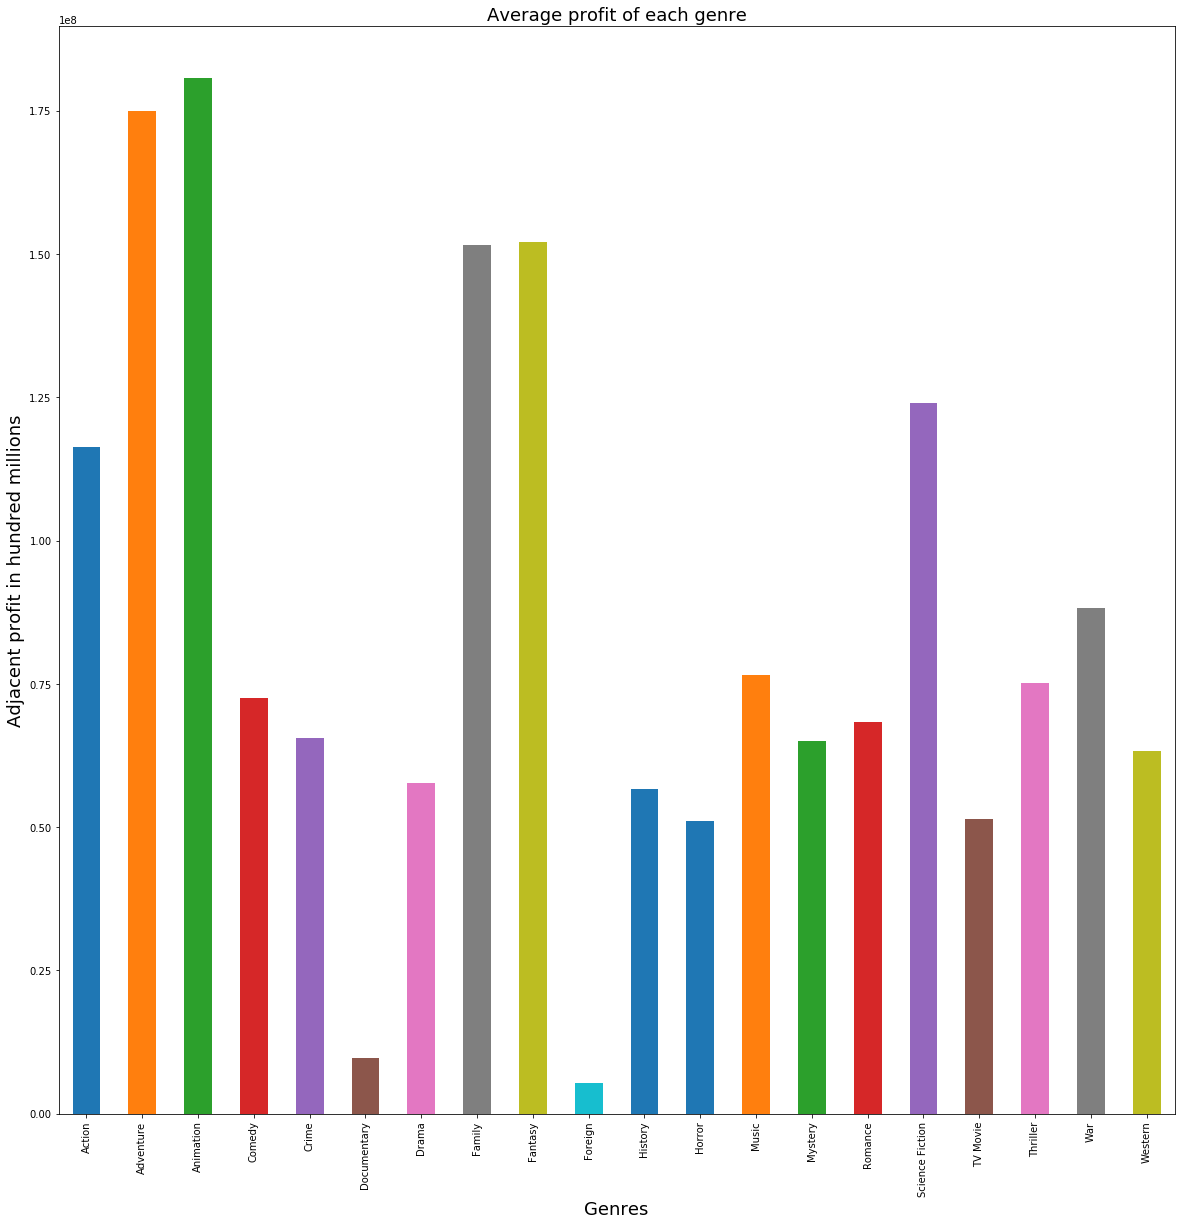

In [19]:
profit_mean.plot(kind='bar',figsize=(20,20));
lab_title("Average profit of each genre","Genres","Adjacent profit in hundred millions",18,18,18)
#plt.xlabel("Genres",fontsize=18);
#plt.ylabel("Adjacent profit in hundred millions",fontsize=18);
#plt.title("Average profit of each genre",fontsize=18);

As the figure shows, the most profitable movies are Animation with an average profit of  180,658,776.27$.


In [20]:
pop_mean=df_new.groupby('genre')['popularity'].mean()
pop_mean

genre
Action                            0.93
Adventure                         1.16
Animation                         0.86
Comedy                            0.59
Crime                             0.75
Documentary                       0.18
Drama                             0.59
Family                            0.79
Fantasy                           1.00
Foreign                           0.19
History                           0.58
Horror                            0.47
Music                             0.49
Mystery                           0.69
Romance                           0.59
Science Fiction                   1.01
TV Movie                          0.27
Thriller                          0.74
War                               0.73
Western                           0.59
Name: popularity, dtype: float64

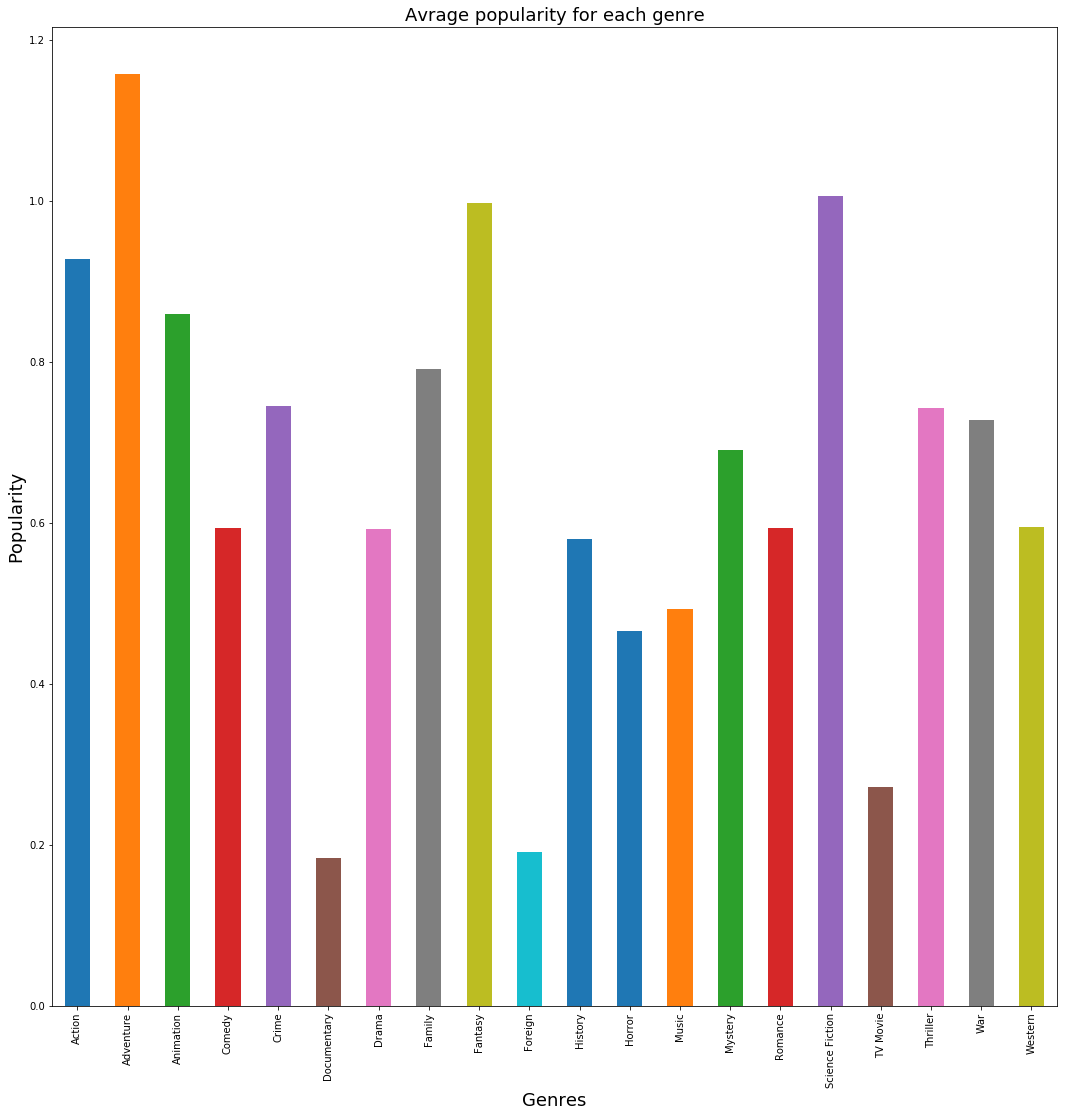

In [21]:
pop_mean.plot(kind='bar',figsize=(18,18));

lab_title("Avrage popularity for each genre","Genres","Popularity",18,18,18)
#plt.xlabel("Genres",fontsize=18);
#plt.ylabel("Popularity",fontsize=18);
#plt.title("Avrage popularity for each genre",fontsize=18);

The most popular movies are Adventure movies with mean popularity of 1.16

### Research Question 2  The growth of the movie industry?

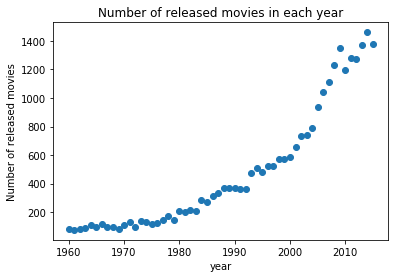

In [22]:
n_mov =df_new['release_year'].value_counts();
plt.scatter(x=n_mov.index,y=n_mov);
lab_title('Number of released movies in each year','year','Number of released movies')
#plt.title('Number of released movies in each year');
#plt.xlabel('year');
#plt.ylabel('Number of released movies');

The figure shows that movie released every year is in increase (Positive correlation)


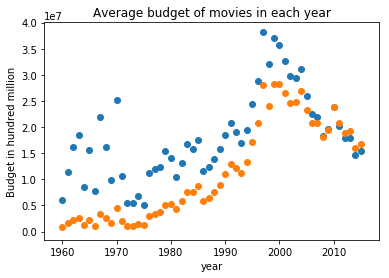

In [23]:
bud_year = df_new.groupby('release_year')['budget_adj'].mean()
df_new['budget']=df_new['budget'].astype('float')
abud_year = df_new.groupby('release_year')['budget'].mean()
plt.scatter(x=bud_year.index,y=bud_year);
plt.scatter(x=abud_year.index,y=abud_year);
lab_title('Average budget of movies in each year','year','Budget in hundred million')
#plt.title('Average budget of movies in each year');
#plt.xlabel('year');
#plt.ylabel('Budget in hundred million');

we changed data type of budget to float then get the mean budget and adjacent budget and plotted with years to see the relation


The figure shows that the budget and adjacent budget that is being invested in movie production is increasing by time (Positive correlation)


the above two figures shows that the movie industry is getting bigger by time as number of released movies and mean budget of movies are increasing by time

### Research Question 3  What is the relation between vote and other factors?

Are movies with higher budget get higher votes?

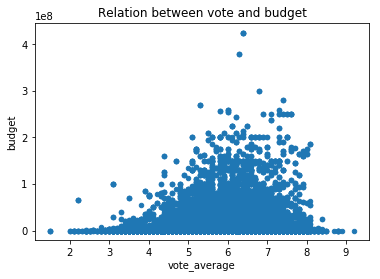

In [24]:
df_new['budget']=df_new['budget'].astype('float')
df_new.plot(y='budget',x='vote_average',kind = 'scatter');
plt.title('Relation between vote and budget');

we had to change data type of budget to float then create our scatter plot

The figure shows that there is positive correlation between vote and budget till vote average 6 and negative correlation afterwards

### Are movies with higher votes are profitable?

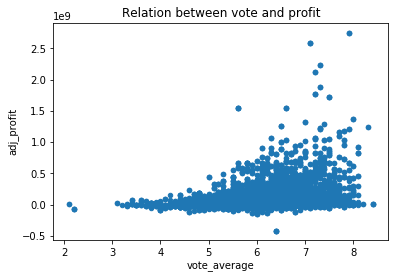

In [25]:
df_new.plot(y='adj_profit',x='vote_average',kind = 'scatter');
plt.title('Relation between vote and profit');

The figure shows that movies with higher vote are more profitable


### Are higher votes movies more popular?

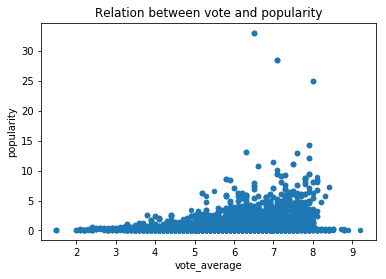

In [26]:
df_new['vote_count']=df_new['vote_count'].astype('float')
df_new.plot(x='vote_average',y='popularity',kind = 'scatter');
plt.title('Relation between vote and popularity');

we changed data type of vote count to float then plotted our scatter diagram

The Figure shows that movies with higher vote are more popular (Positive correlation)

## Lets Split our data to decades and see how much each decade take

In [27]:
bin_edges = [1959,1969,1979,1989,1999,2009,2015]
bin_labels = ['60s','70s','80s','90s','2000s','2010 to 15']
df_new['decade']= pd.cut(df_new['release_year'],bin_edges,labels=bin_labels)

df_60 = df_new[df_new['decade']=="60s"]
df_70 = df_new[df_new['decade']=="70s"]
df_80 = df_new[df_new['decade']=="80s"]
df_90 = df_new[df_new['decade']=="90s"]
df_20 = df_new[df_new['decade']=="2000s"]
df_21 = df_new[df_new['decade']=="2010 to 15"]

Text(0,0.5,' ')

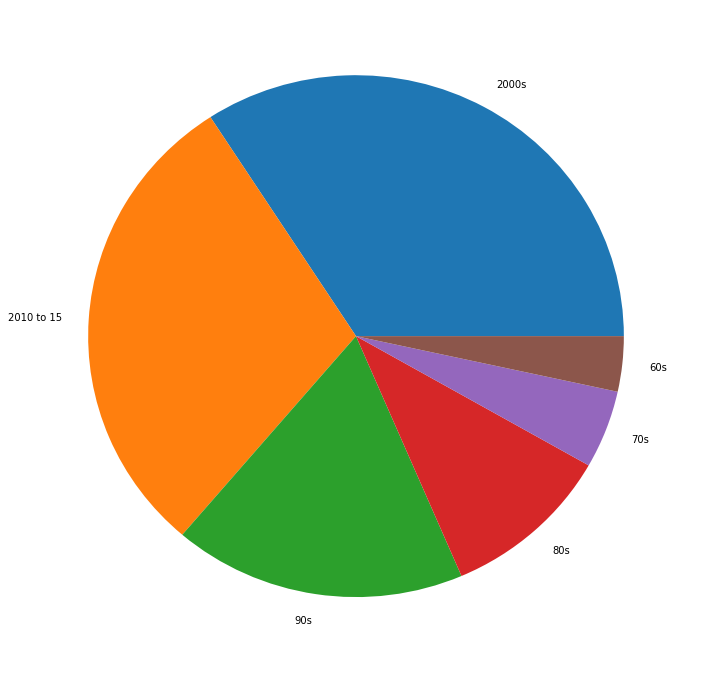

In [28]:
df_new['decade'].value_counts().plot(kind='pie',figsize=(12,12));
plt.ylabel(' ')


This pie chart shows us the portion of that each decade takes in our dataset

<a id='conclusions'></a>
## Conclusions

With our investigation findings we were able to answer many questions,we were able to know that most of the movies released falls under the genre of Drama,the most profitable movies are animation and the most popular movies are Adventure movies,Also
we have seen that the movie industry is in growth as number of movies released each year are increasing also that the average budget of theses movies is increasing, we have also found out the relation between vote_average(movie rating) ,popularity,budget and profit which shows some positive correlation in terms of popularity and profit and shows a positive negative relation in terms of budget at vote average of 6,in the end with this data with further investigation we can find who is best director best director for each genre.




### Limitations
There are limitations to our analysis due to missing data, alot of revenue data is missing specially for older and forgein movies, due to huge gap in vote counts movie ratings comparing will not be accurate, also if awards winning and nominations 
are provided it would give us more insight.
